# Versuch 8
## Neutralisierungsenthalpie
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen (Grafiken erstellen, lineare Regressionen,…)

Falls ihr später noch Module hinzufügen möchtest, könnt ihr das jederzeit tun. Bedenkt aber, dass ihr bei Änderungen die entsprechende Zelle jedesmal erneut ausführen müsst.

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Wenn ihr wollt, könnt ihr auch einige für die Auswertung notwendige Naturkonstanten bereits jetzt importieren. Bedenkt, dass ihr diese Variablennamen nicht erneut nutzen solltet in der Auswertung! Sinnvoll wäre beispielsweise die Avogadrokonstante $N_\mathrm{A}$.

In [2]:
from Hilfsdateien.importe_Konstanten import *

## Erster Auswertungsschritt
Zunächst muss die gemessene Spannung $U$ des Thermoelementes mit der Temperatur $T$ oder der Celsius-Temperatur $\vartheta$ in Beziehung gesetzt werden. Es soll von einem linearen Zusammenhang ausgegangen werden.

Hierzu müssen zunächst die Daten eingelesen werden. Hierzu kann <code>np.genfromtxt</code> genutzt werden. Die Datensätze besitzen das folgende Problem: Anstatt eines Punkts werden Kommas als Dezimalseparator genutzt. Folglich müssen die Kommas erst in Punkte konvertiert werden. Durch eine [Internetrecherche](https://github.com/numpy/numpy/issues/13810#issuecomment-504675321) kann eine einfache Methode zum Umgang mit dem Problem gefunden werden.

__Erklärung für lambda ergänzen und insbesidnere, das vorne die Spalte steht__

In [3]:
calibration_data = np.genfromtxt('data_V8/Kalibrier.txt',converters = {0: lambda s: float(s.decode("UTF-8").replace(",", ".")),1: lambda s: float(s.decode("UTF-8").replace(",", "."))}, skip_header=1)
print(calibration_data)     

[[-17.73   0.45]
 [-17.59   0.46]
 [-17.66   0.46]
 [-17.66   0.48]
 [-17.54   0.48]
 [-17.52   0.48]
 [-17.4    0.49]
 [-17.25   0.49]
 [-17.2    0.5 ]
 [-17.1    0.51]
 [-17.1    0.51]
 [ -7.2    2.7 ]
 [ -7.76   2.81]
 [ -7.72   2.8 ]
 [ -7.75   2.78]
 [ -7.71   2.78]
 [ -7.75   2.77]
 [ -7.73   2.76]
 [ -7.67   2.75]
 [ -7.72   2.74]
 [ -7.71   2.74]
 [ -7.8    2.73]
 [ -7.81   2.72]]


Nachdem nun somit die Kalibrierdaten eingelesen sind, soll die lineare Kalibrierfunktion erstellt werden. Hierzu bietet sich <code>linregress</code> an.

In [4]:
calibration = linregress(calibration_data[:,0],calibration_data[:,1])
m_cal = np.array([calibration.slope,calibration.stderr])
b_cal = calibration.intercept

Diese Kalibrierungsfunktion ist nun aufzutragen. Welche Bibliothek könnte euch helfen, Auftragungen anzufertigen?

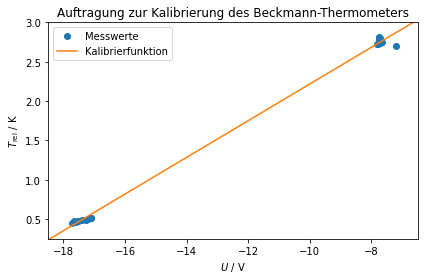

In [5]:
plt.plot(calibration_data[:,0],calibration_data[:,1],'o',label="Messwerte")
plt.xlim(-18.5,-6.5)
plt.ylim(.25,3.0)
x_range = np.arange(-19,-5)
plt.plot(x_range,m_cal[0]*x_range + b_cal ,label="Kalibrierfunktion")
plt.title("Auftragung zur Kalibrierung des Beckmann-Thermometers")
plt.xlabel("$U$ / V")
plt.ylabel("$T_\mathrm{rel}$ / K")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

Für später kann es nützlich sein, bereits eine Funktion zu definieren, welche Spannungen in Temperaturen umrechnet.

In [6]:
def U2T(voltage):
    return m_cal[0]*voltage + b_cal

## Zweiter Auswertungsschritt
Nachdem das Beckmann-Thermometer kalibriert ist, muss als nächstes die Wärmekapazität des Kalorimeters bestimmt werden. Anstatt manuell Variablen zu definieren und manuell die Ableitungen zu bilden, wollen wir lieber Python für uns rechnen lassen. Befehle von welchem Modul könnten uns helfen? Benutzt am besten ein einheitliches Schema beim Benennen von Variablen

Zu bestimmen ist die isobare Wärmekapazität $C_\mathrm{p}$ nach
\begin{align}
C_\mathrm{p} = \frac{U\cdot I\cdot t}{\Delta T}.
\end{align}

Hierfür müssen zunächst die gemessenen Spannungen $U$ und die Ströme $I$ der jeweiligen Messung angegeben werden. Entgegen dem üblichen Trend definiert ihr diese selber. Wählt ein sinnvolles Format aus.

In [7]:
#Werte sind aus einem Datensatz
#Die hier aufgeführte Form ist aus Sicht des Autors angenehmer einzutippen, als eine Vielzahl an 2er-Listen
#Swapaxes überführt das Array in die in der Auswertung übliche Form
messung_1 = np.array([[12.06,12.09,12.10,12.12,12.13],[1479,1481,1483,1484,1485]]).swapaxes(0,1)
messung_2 = np.array([[12.07,12.10,12.11,12.12,12.14],[1480,1482,1484,1485,1485]]).swapaxes(0,1)
messung_3 = np.array([[12.10,12.13,12.14,12.16,12.17],[1483,1483,1487,1489,1490]]).swapaxes(0,1)

#student_faktor ist unter Konstanten definiert
U_1_avg = np.array([np.mean(messung_1[:,0]),student_faktor[3]*np.std(messung_1[:,0])])
U_2_avg = np.array([np.mean(messung_2[:,0]),student_faktor[3]*np.std(messung_2[:,0])])
U_3_avg = np.array([np.mean(messung_3[:,0]),student_faktor[3]*np.std(messung_3[:,0])])
I_1_avg = np.array([np.mean(messung_1[:,1]),student_faktor[3]*np.std(messung_1[:,1])])/1000 #A
I_2_avg = np.array([np.mean(messung_2[:,1]),student_faktor[3]*np.std(messung_2[:,1])])/1000 #A
I_3_avg = np.array([np.mean(messung_3[:,1]),student_faktor[3]*np.std(messung_3[:,1])])/1000 #A

Nun fehlt allerdings noch der Anstieg der Temperatur und das Zeitintervall von diesem. Dies muss aus einer Auftragung der Temperaturkurve für die jeweilige Messung gegen die Zeit erfolgen.

Folglich muss zunächst erneut der Datensatz eingelesen werden. Es ist erneut zu beachten, dass Komma als Dezimalseparator im Datensatz genutzt werden.

In [8]:
with open('data_V8/HCL_NaOH.txt') as data:
        HCl_NaOH = np.genfromtxt((line.replace(',', '.') for line in data), skip_header=2,usecols=(0,1))
with open('data_V8/CH3COOH_NaOH.txt') as data:
        HOAc_NaOH = np.genfromtxt((line.replace(',', '.') for line in data), skip_header=2,usecols=(0,1))
with open('data_V8/Verduennung_HCL.txt') as data:
        HCl_H2O = np.genfromtxt((line.replace(',', '.') for line in data), skip_header=2,usecols=(0,1))        

Diese können nun geplottet werden. Wie ist der Temperaturanstieg korrekt zu bestimmen und was muss hierzu genutzt werden?

Bei der Integration muss beachtet werden, dass eine numerische Integration zu nutzen ist. Möglichkeiten sind die numerische Integration z. B. nach der [Trapezregel](https://de.wikipedia.org/wiki/Trapezregel), [Simpsonregel](https://de.wikipedia.org/wiki/Simpsonregel) oder durch [Romberg-Integration](https://de.wikipedia.org/wiki/Romberg-Integration). 

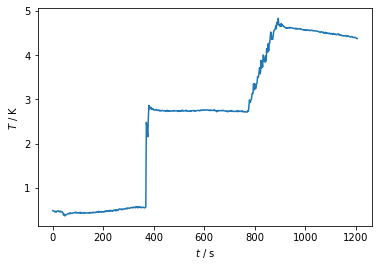

In [9]:
t_a1 = 350 #s
t_e1 = 400 #s
t_a2 = 750 #s
t_e2 = 950 #s
anfang = linregress(np.extract(HCl_NaOH[:,0]/1000 < t_a1, HCl_NaOH[:,0]/1000) ,np.extract(HCl_NaOH[:,0]/1000 < t_a1, HCl_NaOH[:,1]/1000))
mitte = linregress(np.extract((HCl_NaOH[:,0]/1000 > t_a1) & (HCl_NaOH[:,0]/1000 < t_e2), HCl_NaOH[:,0]/1000) ,np.extract((HCl_NaOH[:,0]/1000 > t_a1) & (HCl_NaOH[:,0]/1000 < t_e2), HCl_NaOH[:,1]/1000))
ende = linregress(np.extract(HCl_NaOH[:,0]/1000 > t_e2, HCl_NaOH[:,0]/1000) ,np.extract(HCl_NaOH[:,0]/1000 > t_e2, HCl_NaOH[:,1]/1000))

#WEITERMACHEN

plt.plot(HCl_NaOH[:,0]/1000,U2T(HCl_NaOH[:,1]),'-')
plt.xlabel("$t$ / s")
plt.ylabel("$T$ / K" )
plt.show()
#plt.savefig('test.pdf',dpi=2400)
plt.close()

In [10]:
Cp, U, dU, I, dI, t, dt, dTel, ddTel = symbols('Cp U ΔU I ΔI t Δt dTel ΔdTel')
Cp = U*I*t/dTel
dCp = sqrt((diff(Cp,U)*dU)**2 + (diff(Cp,I)*dI)**2 + (diff(Cp,t)*dt)**2 + (diff(Cp,dTel)*ddTel)**2)
Cp = lambdify([U,I,t,dTel],Cp,'numpy')
dCp = lambdify([U,dU,I,dI,t,dt,dTel,ddTel],dCp,'numpy')

#KORRIGIEREN
T_el_1 = T_el_2 = T_el_3 = 1.8 #K, angenommen
dT_el = 0.1 #K, angenommen
t_1 = t_2 = t_3 = 100 #s, angenommen

C_p_1 = Cp(U_1_avg[0],I_1_avg[0],t_1,T_el_1)
dC_p_1 = dCp(U_1_avg[0],U_1_avg[1],I_1_avg[0],I_1_avg[1],t_1,0.2,T_el_1,dT_el)
C_p_2 = Cp(U_2_avg[0],I_2_avg[0],t_2,T_el_2)
dC_p_2 = dCp(U_2_avg[0],U_2_avg[1],I_2_avg[0],I_2_avg[1],t_2,0.2,T_el_2,dT_el)
C_p_3 = Cp(U_3_avg[0],I_3_avg[0],t_3,T_el_3)
dC_p_3 = dCp(U_3_avg[0],U_3_avg[1],I_3_avg[0],I_3_avg[1],t_3,0.2,T_el_3,dT_el)

print(str(np.array([C_p_1,dC_p_1])/1000) + " kJ/mol")
print(str(np.array([C_p_2,dC_p_2])/1000) + " kJ/mol")
print(str(np.array([C_p_3,dC_p_3])/1000) + " kJ/mol")

[0.997 0.056] kJ/mol
[0.998 0.056] kJ/mol
[1.002 0.056] kJ/mol


## Stoffmengen
Uns interessieren die Ergebnisse als eine molare Größe, weshalb als nächstes die Stoffmenge der verbrauchten Säure zu ermitteln ist. 

In [11]:
# Aufbau HCl/NaOH, HCl/H2O, HOAc
prae = np.array([144.0544,142.6537,140.2260])
post = np.array([123.6863,122.4112,120.1982])
verbrauch = prae-post

konzentration = 2.0e-3 #mol/cm³
#Dichten, Werte von Studenten anzugeben
rho = np.array([1.03,1.03,1.0152])
delta_m = 2*0.05e-3 #mg, angenommen

n_verbrauch = verbrauch*konzentration/rho
delta_n_verbrauch = delta_m*konzentration/rho
print(n_verbrauch)

[0.04  0.039 0.039]


## Verdünnungsenthalpie
